In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [248]:
IMAGE_PATH = "../img/"
DATA_PATH = "../output/"

# Direct Comments

First we can see the direct comments (The ID_Posting of the UserPost is the ID_Posting_Parent of UserComment)
E.g at 2019-05-12 'NICE!' directly commented '!SeMteX!'s post

In [4]:
direct_comments = pd.read_csv(f"{DATA_PATH}direct_comments.csv")
direct_comments.sort_values(["UserPost", "UserComment"])

,UserPost,UserComment,ID_Posting,ID_Posting_Comment,CommentCreatedAt
186483,!SeMteX!,NICE!,1041381340,1041385498,2019-05-12 10:28:06.340
313245,"""Maxmustermann""",WilWil,1041840006,1041841069,2019-05-21 22:29:57.300
313246,"""Maxmustermann""",grauli,1041840006,1041840829,2019-05-21 22:23:14.597
313244,"""Maxmustermann""",rule eleven,1041840006,1041840316,2019-05-21 22:10:14.867
83357,"""Unschuldsvermutung""",held der arbeit klasse II,1041344453,1041344889,2019-05-10 15:39:26.690
...,...,...,...,...,...
18781,Žarko Jankovic,tt88,1041093644,1041094261,2019-05-02 13:02:20.050
3297,Žarko Jankovic,wakman,1041092153,1041092744,2019-05-02 12:14:41.927
19016,Žarko Jankovic,whatever - nevermind,1041095020,1041110668,2019-05-03 00:26:01.497
3296,Žarko Jankovic,ämpersand,1041092153,1041093895,2019-05-02 12:49:23.453


Now we can find some heavy users (having the most days with (direct comments) interaction)

In [238]:
direct_comments["InteractionDate"] = pd.to_datetime(direct_comments["CommentCreatedAt"]).dt.date
direct_comments["Users"] = direct_comments.apply(lambda x: str(sorted([str(x["UserPost"]), str(x["UserComment"])])), axis=1)

In [239]:
count_user_interaction = direct_comments.groupby("Users")["InteractionDate"].nunique().sort_values(ascending=False)
count_user_interaction

Users
['Leider Realist', 'humanökologische Pyramide']               27
['Flavio Marconi', 'eine kluge Katze kratzt keinen Köter']    27
['katze77', 'la tricoteuse']                                  26
['Resi Tupfer', 'ildiko1905']                                 26
['Kerscheplotzer', "soschaut'saus"]                           25
                                                              ..
['Eswarmalsoschön?', 'Igteil Fert']                            1
['Eswarmalsoschön?', 'Ich sag dazu nur....']                   1
['Eswarmalsoschön?', 'Humanismus ist heilbar']                 1
['Eswarmalsoschön?', 'Hudri Wudri']                            1
['ämpersand', 'Žarko Jankovic']                                1
Name: InteractionDate, Length: 334045, dtype: int64

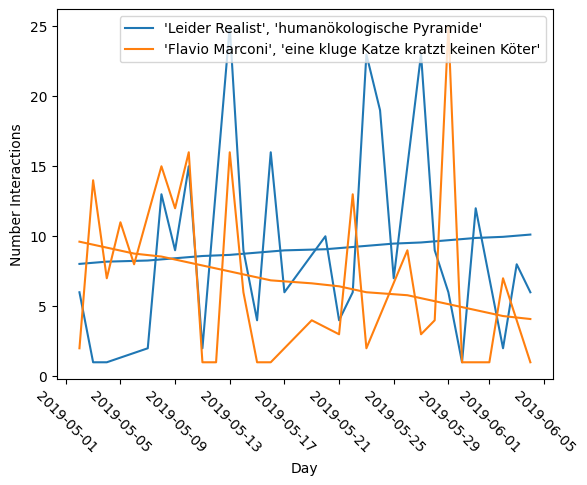

In [249]:
def plot_sum_user_counts(i, users):
    direct_comments_heavy_users = direct_comments[direct_comments["Users"] == users].sort_values("InteractionDate")
    user1, user2 = direct_comments_heavy_users.values[0][0:2]
    label = f"'{user1}', '{user2}'"
    res = direct_comments_heavy_users.groupby("InteractionDate")["ID_Posting_Comment"].count().sort_index()
    # direct_comments_heavy_users.groupby("InteractionDate")["CommentCreatedAt"]
    ax = res.sort_index().plot(label=label)
    [slope, intercept] = np.polyfit(range(0, len(res)), res.values, 1)
    plt.plot(res.index, (np.arange(0,len(res))*slope)+intercept, color = ax.get_lines()[2*i].get_color())


for i in range(0, 2):
    users = count_user_interaction.index[i]
    plot_sum_user_counts(i, users)


plt.legend()
plt.xlabel("Day")
plt.ylabel("Number Interactions")
plt.xticks(rotation=-45)
plt.savefig(f"{IMAGE_PATH}comments_over_time.png")
plt.show()

#HeavyUsers (#Interactions >= 10): 75 
 (mean): 0.004444515692301452


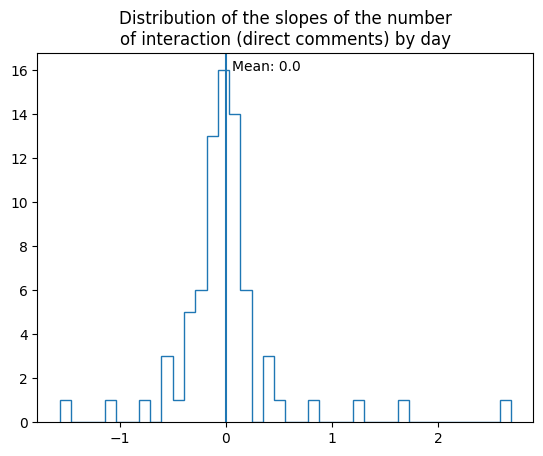

In [267]:
min_interaction = 10
heavy_users = count_user_interaction[count_user_interaction > min_interaction].index
print(f"#HeavyUsers (#Interactions >= {min_interaction}): {len(heavy_users)} ")

user_slopes = []
for users in heavy_users:
    comments_users = direct_comments[direct_comments["Users"] == users]
    date_comments = comments_users.groupby("InteractionDate")["ID_Posting_Comment"].count()
    [slope, intercept] = np.polyfit(range(0, len(date_comments)), date_comments.values, 1)

    user_slopes.append((users, (slope, intercept)))

slopes = np.asarray(list(map(lambda x: x[1][0], user_slopes)))
mean_slopes = np.mean(slopes)

print(f" (mean): {mean_slopes}")

counts, bins = np.histogram(slopes, bins=40)
plt.stairs(counts, bins)
plt.axvline(x=mean_slopes)
title = "Distribution of the slopes of the number\nof interactions (direct comments) by day"
plt.title(title)
plt.annotate(f'Mean: {round(mean_slopes, 2)}', xy=(np.mean(bins)/10 + mean_slopes, max(counts)))
title_clean = title.replace(' ', '_').replace('\n', '')
plt.savefig(f"../img/{title_clean}.png")
plt.show()

# Votings

Now we can check if users become similar in their voting behaviour. Therefore, we load the output of the scripts for the user_votes.
Here we see the user who posted the post and the user who commented at a certain time. Also we can see if the vote was negative (-1) or positive (+1)

In [46]:
user_votes = pd.read_csv(f"{DATA_PATH}user_votes.csv")
user_votes["InteractionDate"] = pd.to_datetime(user_votes["VoteCreatedAt"]).dt.date
user_votes["Users"] = user_votes.apply(lambda x: str(sorted([str(x["UserPost"]), str(x["UserVote"])])), axis=1)
user_votes

,UserPost,UserVote,VoteCreatedAt,Vote,InteractionDate,Users
0,Heckscheibenwischer,Kopper Stefan,2019-05-06 16:47:46.883,-1,2019-05-06,"['Heckscheibenwischer', 'Kopper Stefan']"
1,Heinz Fettleber,Kopper Stefan,2019-05-01 22:19:06.240,-1,2019-05-01,"['Heinz Fettleber', 'Kopper Stefan']"
2,markvienna,Kopper Stefan,2019-05-01 20:46:16.267,1,2019-05-01,"['Kopper Stefan', 'markvienna']"
3,Bruce Campbell,Dr. CMAP,2019-05-01 23:54:54.600,1,2019-05-01,"['Bruce Campbell', 'Dr. CMAP']"
4,Erdäpfelsack,Dr. CMAP,2019-05-01 20:59:29.910,1,2019-05-01,"['Dr. CMAP', 'Erdäpfelsack']"
...,...,...,...,...,...,...
3824979,Krugerrand,oswaldsee,2019-05-31 23:36:50.960,1,2019-05-31,"['Krugerrand', 'oswaldsee']"
3824980,RS69,youming,2019-06-02 00:11:51.430,-1,2019-06-02,"['RS69', 'youming']"
3824981,RS69,Dampfschiff St. Nepomuk,2019-06-02 00:07:53.280,-1,2019-06-02,"['Dampfschiff St. Nepomuk', 'RS69']"
3824982,Georg_Konrad,Pfefferstreuer,2019-06-01 23:01:07.253,1,2019-06-01,"['Georg_Konrad', 'Pfefferstreuer']"


Again we can search for heavy voters

In [47]:
count_user_interaction_dates = user_votes.groupby(["Users"])["InteractionDate"].nunique().sort_values(ascending=False)
count_user_interaction_dates

Users
['la tricoteuse', 'madame schmeckenwasser']    32
['katze77', 'la tricoteuse']                   32
['42', 'Trigintipetala']                       31
['Proudhon', 'la tricoteuse']                  31
['Trigintipetala', 'jeff5']                    31
                                               ..
['Fichtl_vom_Zauberland', 'bencostan']          1
['Fichtl_vom_Zauberland', 'bernhardposch']      1
['Fichtl_vom_Zauberland', 'berti russell']      1
['Fichtl_vom_Zauberland', 'bertolo']            1
['ümitza', 'Žarko Jankovic']                    1
Name: InteractionDate, Length: 2854684, dtype: int64

Text(0.5, 0, 'Day')

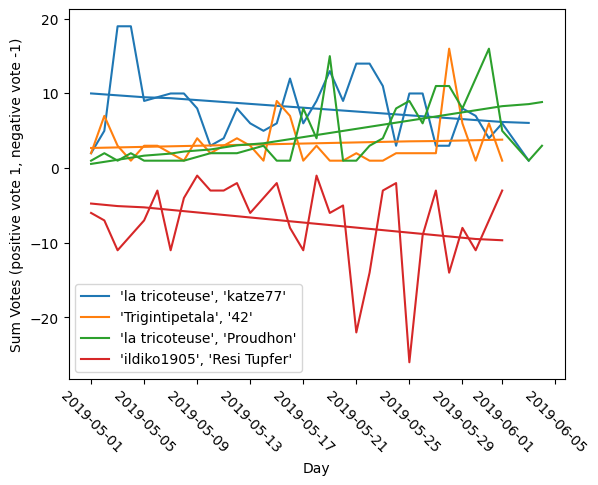

In [223]:
def plot_sum_user_counts(i, users):
    user_votes_heavy_users = user_votes[(user_votes["Users"] == users)].sort_values("VoteCreatedAt")
    user1, user2 = user_votes_heavy_users.values[0][0:2]
    label = f"'{user1}', '{user2}'"
    res = user_votes_heavy_users.groupby("InteractionDate")["Vote"].sum()
    ax = res.sort_index().plot(label=label)
    [slope, intercept] = np.polyfit(range(0, len(res)), res.values, 1)
    plt.plot(res.index, (np.arange(0,len(res))*slope)+intercept, color = ax.get_lines()[2*i].get_color())


for i, i_user in enumerate([1, 2, 3 , 8]):
    users = count_user_interaction_dates.index[i_user]
    plot_sum_user_counts(i, users)

plt.legend()
plt.xticks(rotation=-45)
plt.ylabel("Sum Votes (positive vote 1, negative vote -1)")
plt.xlabel("Day")

In [205]:
min_interaction = 20
heavy_users = count_user_interaction_dates[count_user_interaction_dates > min_interaction].index
print(f"#HeavyUsers (#Interactions >= {min_interaction}): {len(heavy_users)} ")

positive_users = []
negative_users = []

for users in heavy_users:
    votes_users = user_votes[user_votes["Users"] == users]
    date_votes = votes_users.groupby("InteractionDate").agg({"Vote": ["sum", "mean"]})
    [slope, intercept] = np.polyfit(range(0, len(date_votes)), date_votes[('Vote',  'sum')], 1)

    if np.mean(date_votes[('Vote',  'mean')]) > 0:
        positive_users.append((users, (slope, intercept)))
    else:
        negative_users.append((users, (slope, intercept)))

#HeavyUsers (#Interactions >= 20): 112 


Distribution of the slopes for positive similar users (mean): 0.046627359577534354


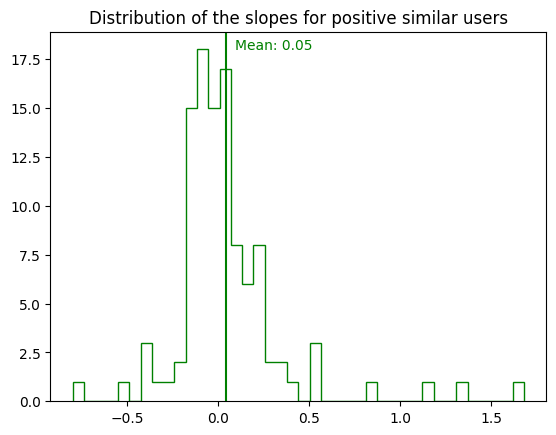

Distribution of the slopes for negative similar users (mean): 0.029133546430784904


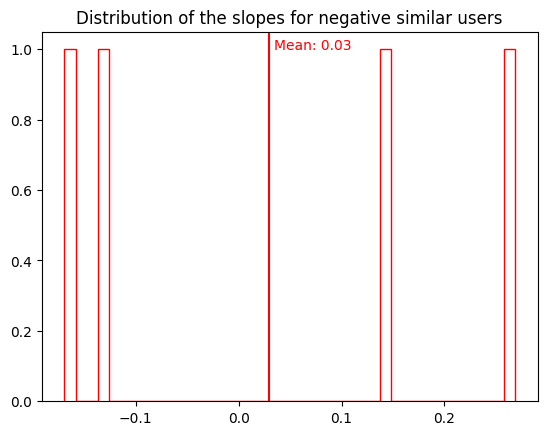

In [220]:
def plot_slope_hist(data, title, color):
    slopes = np.asarray(list(map(lambda x: x[1][0], data)))
    mean_slopes = np.mean(slopes)

    print(f"{title} (mean): {mean_slopes}")
    counts, bins = np.histogram(slopes, bins=40)

    plt.stairs(counts, bins, color = color)
    plt.axvline(x=mean_slopes, color = color)
    plt.title(title)
    plt.annotate(f'Mean: {round(mean_slopes, 2)}', xy=(np.mean(bins)/10 + mean_slopes, max(counts)), color=color)
    plt.savefig(f"../img/{title.replace(' ', '_')}.png")
    plt.show()



plot_slope_hist(positive_users, "Distribution of the slopes for positive similar users", "green")
plot_slope_hist(negative_users, "Distribution of the slopes for negative similar users", "red")

-0.1695216907675194 -4.741935483870968


(array([18017., 18021., 18025., 18029., 18033., 18037., 18041., 18045.,
        18048.]),
 [Text(18017.0, 0, '2019-05-01'),
  Text(18021.0, 0, '2019-05-05'),
  Text(18025.0, 0, '2019-05-09'),
  Text(18029.0, 0, '2019-05-13'),
  Text(18033.0, 0, '2019-05-17'),
  Text(18037.0, 0, '2019-05-21'),
  Text(18041.0, 0, '2019-05-25'),
  Text(18045.0, 0, '2019-05-29'),
  Text(18048.0, 0, '2019-06-01')])

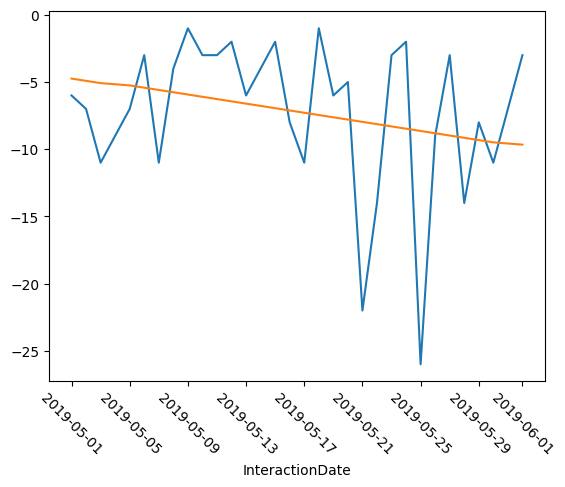

In [235]:
res = user_votes[(user_votes["Users"] == users)].groupby("InteractionDate")["Vote"].sum()
res.plot()
print(slope, intercept)
[slope, intercept] = np.polyfit(range(0, len(res)), res.values, 1)
plt.plot(res.index, (np.arange(0,len(res))*slope)+intercept)
plt.xticks(rotation=-45)

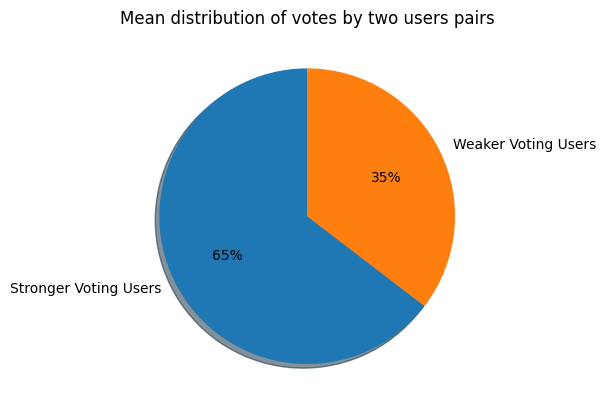

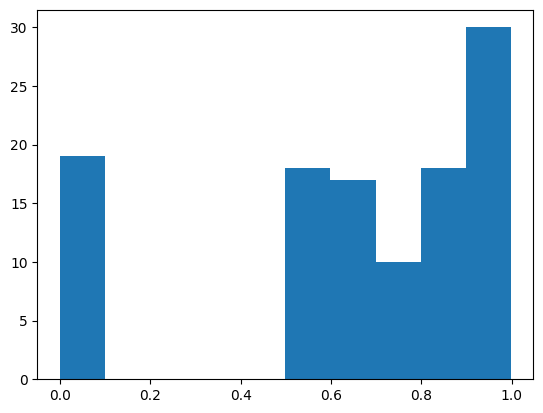

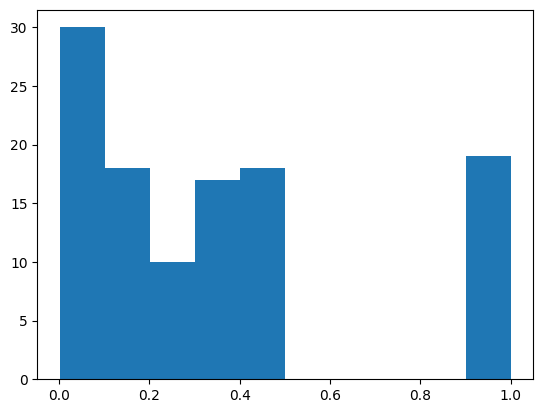

In [315]:
min_interaction = 20
heavy_users = count_user_interaction_dates[count_user_interaction_dates > min_interaction].index

strong_user = []
weak_user = []
for users in heavy_users:
    res = sorted(user_votes[user_votes["Users"] == users][["UserPost", "UserVote"]].value_counts().values)
    if len(res) == 1:
        res.append(0)
    res = np.asarray(res)
    res = res / np.sum(res)
    weak_user.append(res[0])
    strong_user.append(res[1])

strong_user = np.asarray(strong_user)
weak_user = np.asarray(weak_user)

plt.pie([strong_user.mean(), weak_user.mean()], labels=["Stronger Voting Users", "Weaker Voting Users"], autopct='%1.0f%%', shadow=True, startangle=90)
plt.title("Mean distribution of votes by two users pairs")
plt.savefig(f"{IMAGE_PATH}user_pairs_voting_distribution.png")
plt.show()

plt.hist(strong_user)
plt.show()
plt.hist(weak_user)
plt.show()